# The Laplace Transform: Theory and Applications

## Introduction

The **Laplace transform** is a powerful integral transform used extensively in engineering, physics, and applied mathematics. It converts functions of time $f(t)$ into functions of complex frequency $F(s)$, transforming differential equations into algebraic equations that are often easier to solve.

## Mathematical Definition

The Laplace transform of a function $f(t)$ defined for $t \geq 0$ is given by:

$$\mathcal{L}\{f(t)\} = F(s) = \int_0^{\infty} f(t) e^{-st} \, dt$$

where $s = \sigma + i\omega$ is a complex number with $\sigma, \omega \in \mathbb{R}$.

The inverse Laplace transform is defined by the Bromwich integral:

$$\mathcal{L}^{-1}\{F(s)\} = f(t) = \frac{1}{2\pi i} \int_{\gamma - i\infty}^{\gamma + i\infty} F(s) e^{st} \, ds$$

## Key Properties

### Linearity
$$\mathcal{L}\{af(t) + bg(t)\} = aF(s) + bG(s)$$

### Differentiation in Time Domain
$$\mathcal{L}\{f'(t)\} = sF(s) - f(0)$$
$$\mathcal{L}\{f''(t)\} = s^2F(s) - sf(0) - f'(0)$$

### Integration in Time Domain
$$\mathcal{L}\left\{\int_0^t f(\tau) d\tau\right\} = \frac{F(s)}{s}$$

### Time Shifting
$$\mathcal{L}\{f(t-a)u(t-a)\} = e^{-as}F(s)$$

### Frequency Shifting
$$\mathcal{L}\{e^{at}f(t)\} = F(s-a)$$

### Convolution Theorem
$$\mathcal{L}\{(f * g)(t)\} = F(s) \cdot G(s)$$

where $(f * g)(t) = \int_0^t f(\tau)g(t-\tau) d\tau$

## Common Transform Pairs

| $f(t)$ | $F(s)$ |
|--------|--------|
| $1$ | $\frac{1}{s}$ |
| $t^n$ | $\frac{n!}{s^{n+1}}$ |
| $e^{at}$ | $\frac{1}{s-a}$ |
| $\sin(\omega t)$ | $\frac{\omega}{s^2 + \omega^2}$ |
| $\cos(\omega t)$ | $\frac{s}{s^2 + \omega^2}$ |
| $e^{at}\sin(\omega t)$ | $\frac{\omega}{(s-a)^2 + \omega^2}$ |
| $e^{at}\cos(\omega t)$ | $\frac{s-a}{(s-a)^2 + \omega^2}$ |

## Computational Implementation

We will now implement numerical computations and visualizations to explore the Laplace transform. We'll demonstrate:

1. Numerical computation of Laplace transforms
2. Visualization of transform pairs
3. Application to solving differential equations
4. Pole-zero analysis in the s-plane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

# Set up matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['legend.fontsize'] = 10

## Numerical Laplace Transform

We implement a numerical approximation of the Laplace transform using numerical integration. For a function $f(t)$, we compute:

$$F(s) = \int_0^{T_{max}} f(t) e^{-st} \, dt$$

where $T_{max}$ is chosen sufficiently large for convergence.

In [2]:
def numerical_laplace(f, s, t_max=50):
    """
    Compute the numerical Laplace transform of f(t) at complex frequency s.
    
    Parameters:
    -----------
    f : callable
        Function to transform
    s : complex
        Complex frequency
    t_max : float
        Upper integration limit
    
    Returns:
    --------
    complex
        Laplace transform F(s)
    """
    def integrand_real(t):
        return np.real(f(t) * np.exp(-s * t))
    
    def integrand_imag(t):
        return np.imag(f(t) * np.exp(-s * t))
    
    real_part, _ = quad(integrand_real, 0, t_max)
    imag_part, _ = quad(integrand_imag, 0, t_max)
    
    return real_part + 1j * imag_part

# Define test functions
def exponential(t, a=-1):
    """Exponential decay: e^(at)"""
    return np.exp(a * t)

def sine_wave(t, omega=2):
    """Sine wave: sin(omega*t)"""
    return np.sin(omega * t)

def damped_sine(t, a=-0.5, omega=3):
    """Damped sine: e^(at)*sin(omega*t)"""
    return np.exp(a * t) * np.sin(omega * t)

# Verify numerical transform against analytical result
# For f(t) = e^(-t), F(s) = 1/(s+1)
s_test = 2 + 0j
numerical_result = numerical_laplace(lambda t: exponential(t, -1), s_test)
analytical_result = 1 / (s_test + 1)

print("Verification: Laplace Transform of e^(-t) at s=2")
print(f"Numerical result: {numerical_result:.6f}")
print(f"Analytical result: {analytical_result:.6f}")
print(f"Relative error: {abs(numerical_result - analytical_result) / abs(analytical_result) * 100:.4f}%")

Verification: Laplace Transform of e^(-t) at s=2
Numerical result: 0.333333+0.000000j
Analytical result: 0.333333+0.000000j
Relative error: 0.0000%


## Visualization of Transform Pairs

Let's visualize several common Laplace transform pairs, showing both the time-domain function and the magnitude of its Laplace transform along the imaginary axis (i.e., the Fourier transform).

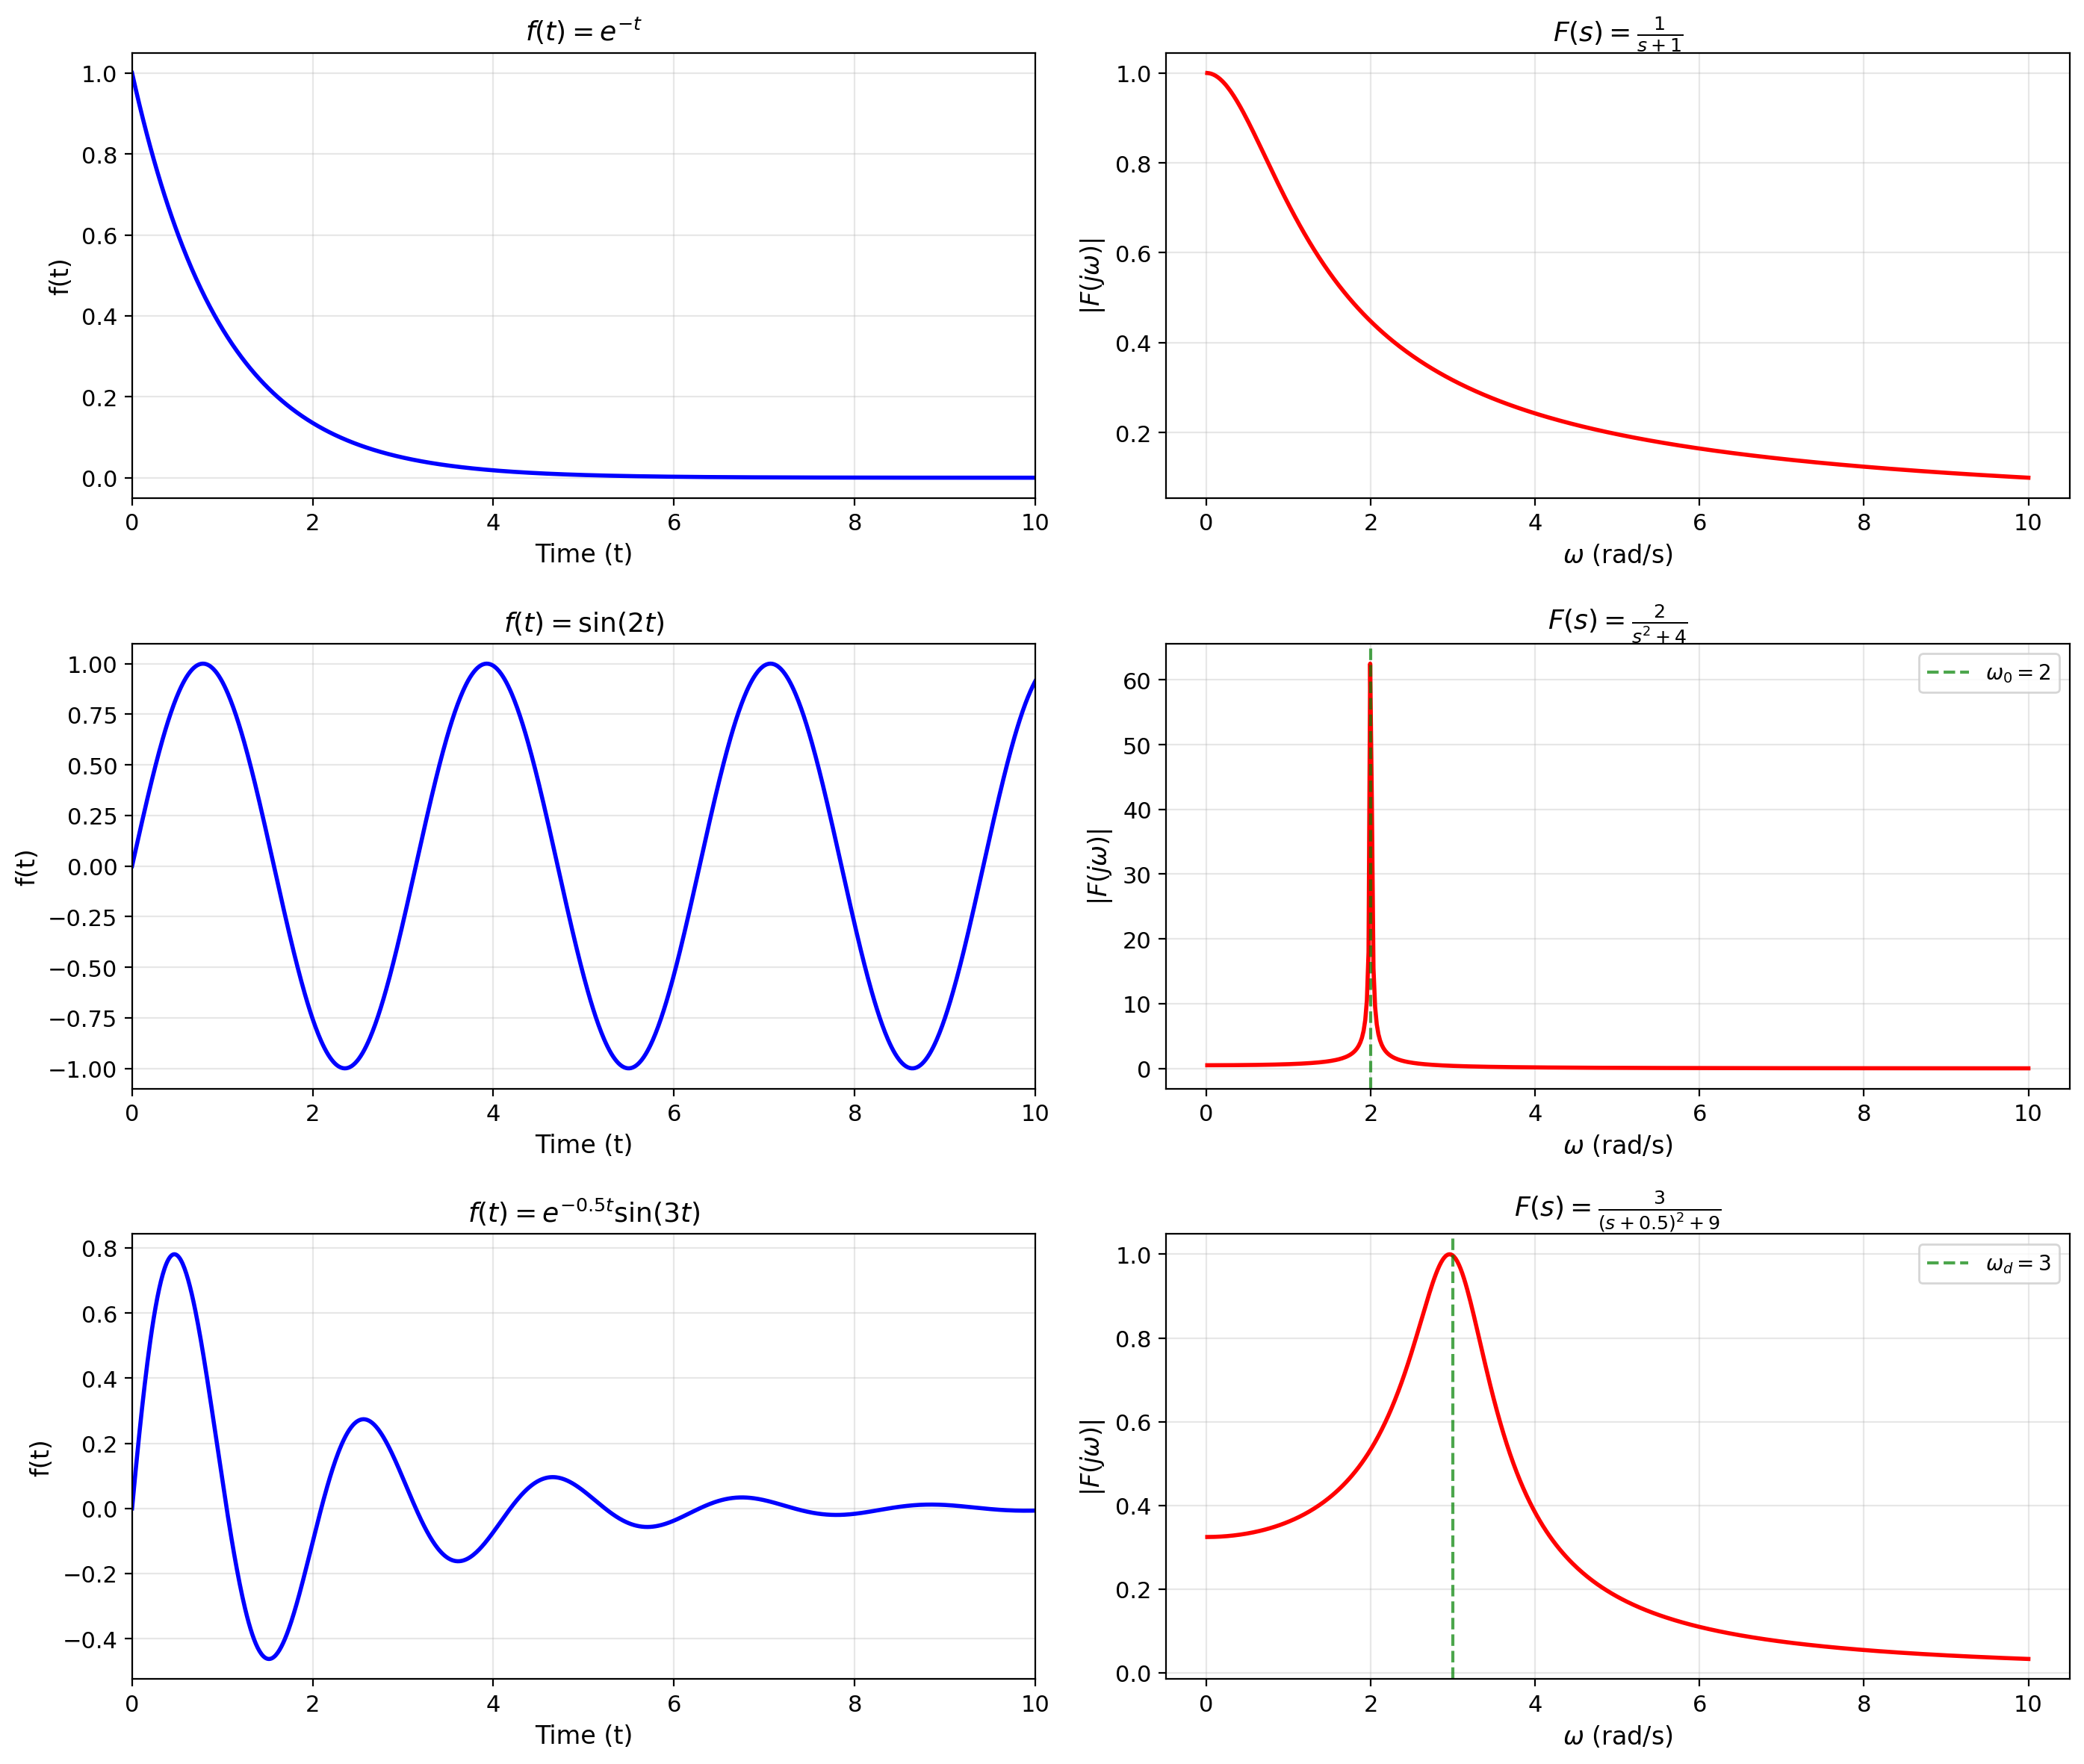


Figure saved to 'plot.png'


In [3]:
# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Time domain
t = np.linspace(0, 10, 1000)

# Frequency domain (along imaginary axis, s = j*omega)
omega = np.linspace(0.01, 10, 500)

# 1. Exponential decay: f(t) = e^(-t), F(s) = 1/(s+1)
a = -1
f1 = np.exp(a * t)
F1_mag = np.abs(1 / (1j * omega - a))

axes[0, 0].plot(t, f1, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Time (t)')
axes[0, 0].set_ylabel('f(t)')
axes[0, 0].set_title(r'$f(t) = e^{-t}$')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim([0, 10])

axes[0, 1].plot(omega, F1_mag, 'r-', linewidth=2)
axes[0, 1].set_xlabel(r'$\omega$ (rad/s)')
axes[0, 1].set_ylabel(r'$|F(j\omega)|$')
axes[0, 1].set_title(r'$F(s) = \frac{1}{s+1}$')
axes[0, 1].grid(True, alpha=0.3)

# 2. Sine wave: f(t) = sin(2t), F(s) = 2/(s^2 + 4)
omega_0 = 2
f2 = np.sin(omega_0 * t)
F2_mag = np.abs(omega_0 / ((1j * omega)**2 + omega_0**2))

axes[1, 0].plot(t, f2, 'b-', linewidth=2)
axes[1, 0].set_xlabel('Time (t)')
axes[1, 0].set_ylabel('f(t)')
axes[1, 0].set_title(r'$f(t) = \sin(2t)$')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, 10])

axes[1, 1].plot(omega, F2_mag, 'r-', linewidth=2)
axes[1, 1].set_xlabel(r'$\omega$ (rad/s)')
axes[1, 1].set_ylabel(r'$|F(j\omega)|$')
axes[1, 1].set_title(r'$F(s) = \frac{2}{s^2+4}$')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=omega_0, color='g', linestyle='--', alpha=0.7, label=r'$\omega_0=2$')
axes[1, 1].legend()

# 3. Damped sine: f(t) = e^(-0.5t)*sin(3t)
alpha = 0.5
omega_d = 3
f3 = np.exp(-alpha * t) * np.sin(omega_d * t)
F3_mag = np.abs(omega_d / ((1j * omega + alpha)**2 + omega_d**2))

axes[2, 0].plot(t, f3, 'b-', linewidth=2)
axes[2, 0].set_xlabel('Time (t)')
axes[2, 0].set_ylabel('f(t)')
axes[2, 0].set_title(r'$f(t) = e^{-0.5t}\sin(3t)$')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim([0, 10])

axes[2, 1].plot(omega, F3_mag, 'r-', linewidth=2)
axes[2, 1].set_xlabel(r'$\omega$ (rad/s)')
axes[2, 1].set_ylabel(r'$|F(j\omega)|$')
axes[2, 1].set_title(r'$F(s) = \frac{3}{(s+0.5)^2+9}$')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].axvline(x=omega_d, color='g', linestyle='--', alpha=0.7, label=r'$\omega_d=3$')
axes[2, 1].legend()

plt.tight_layout()
plt.savefig('laplace_transform_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Application: Solving Differential Equations

The Laplace transform is particularly powerful for solving linear ordinary differential equations with initial conditions. Consider the second-order ODE:

$$\ddot{y} + 2\zeta\omega_n \dot{y} + \omega_n^2 y = \omega_n^2 u(t)$$

with initial conditions $y(0) = 0$, $\dot{y}(0) = 0$, where $u(t)$ is the unit step function.

### Solution Procedure

1. Apply Laplace transform to both sides
2. Use differentiation property: $\mathcal{L}\{\ddot{y}\} = s^2Y(s) - sy(0) - \dot{y}(0)$
3. Solve algebraically for $Y(s)$
4. Apply inverse Laplace transform

The transfer function becomes:

$$H(s) = \frac{Y(s)}{U(s)} = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

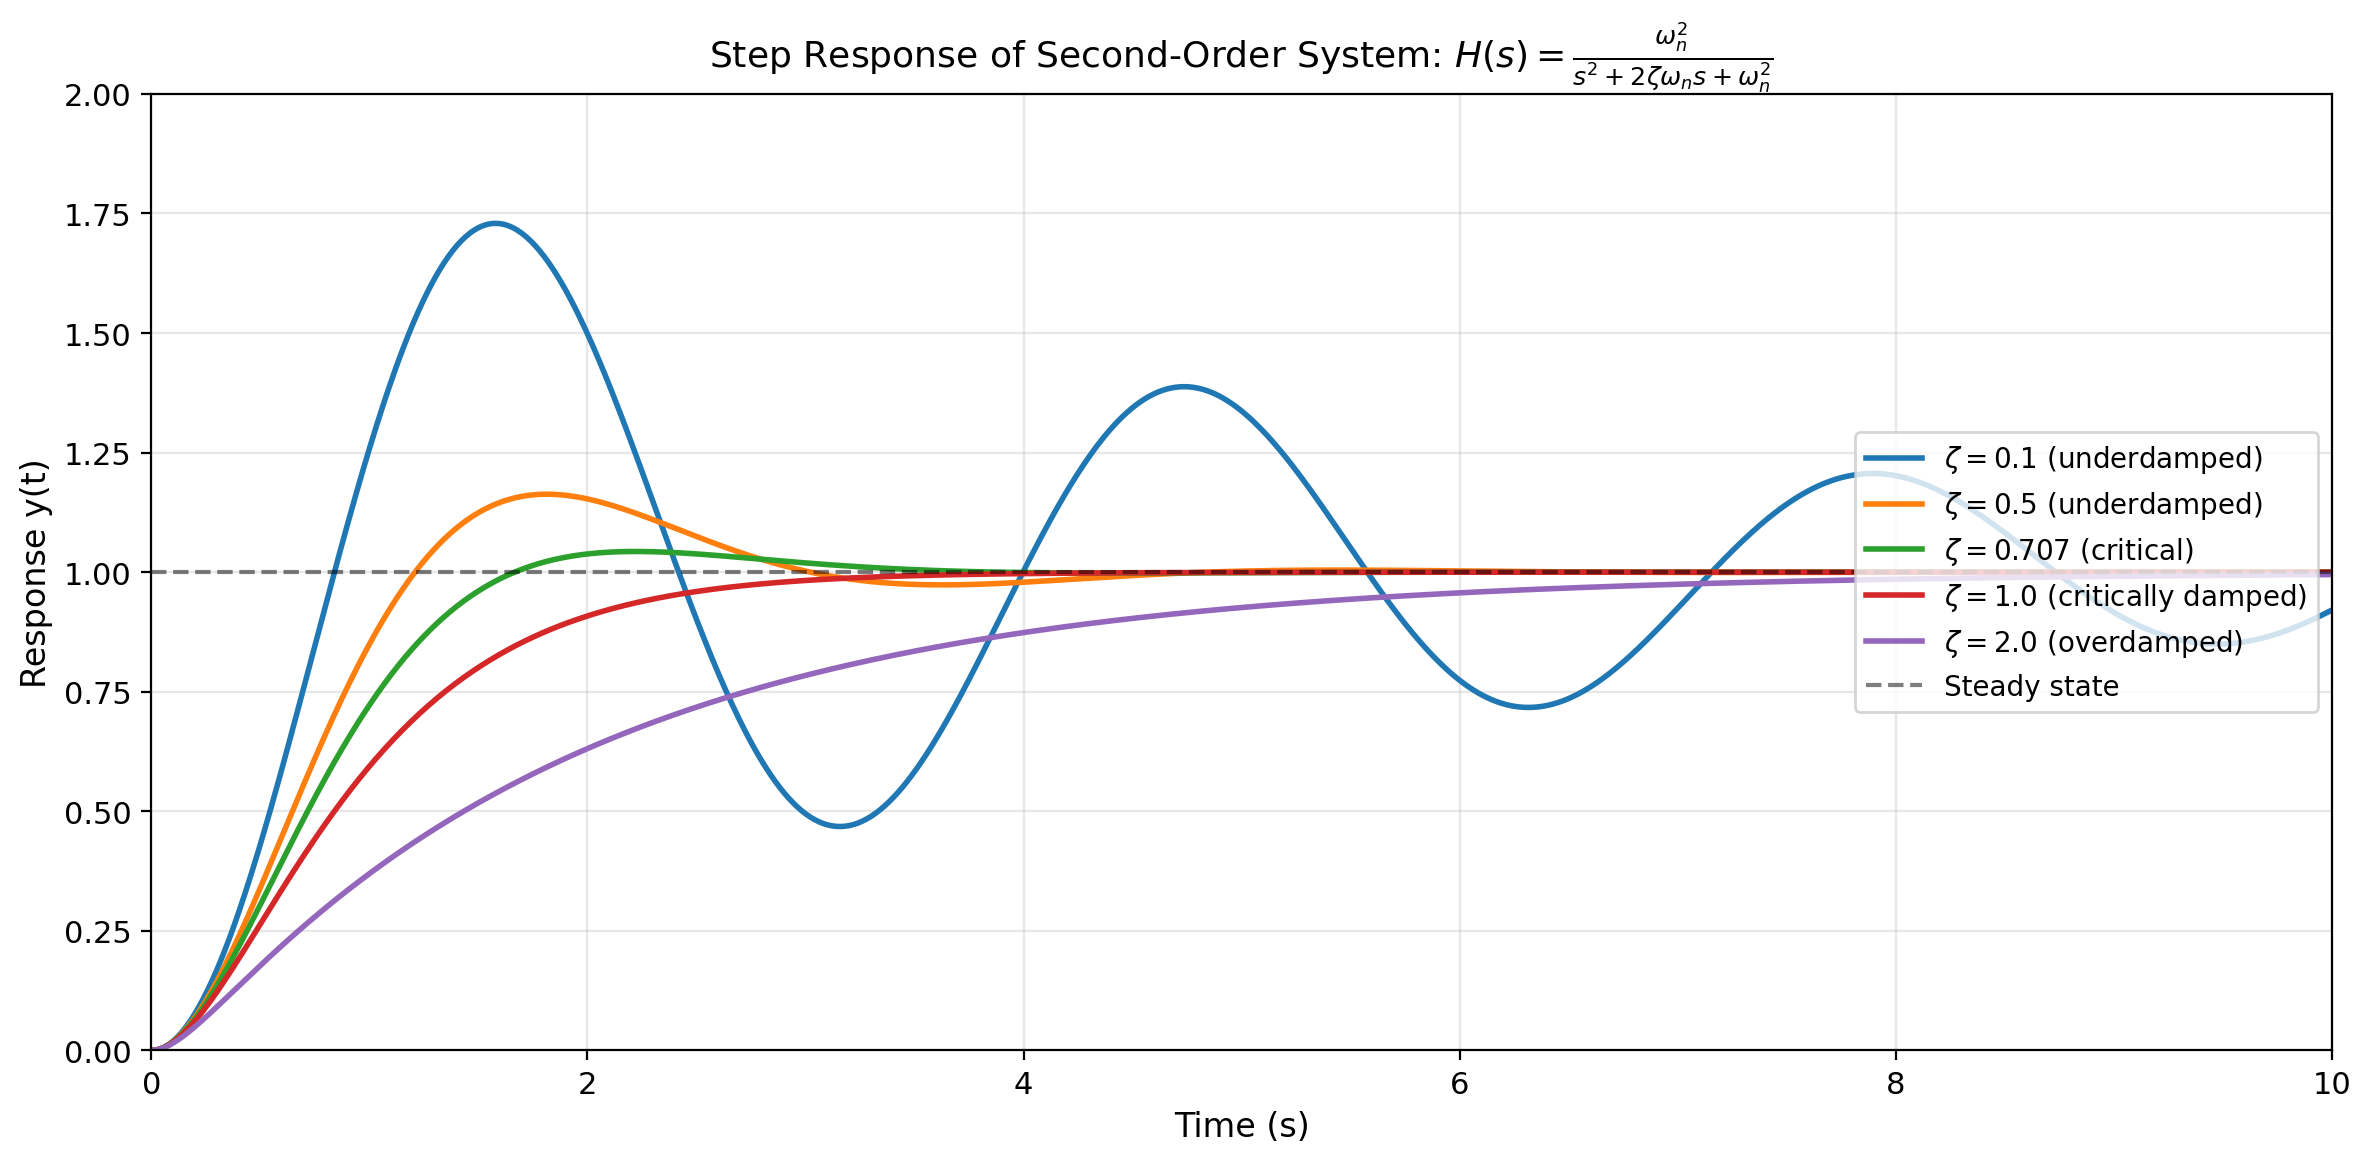

In [4]:
# Second-order system step response for different damping ratios
omega_n = 2.0  # Natural frequency
t = np.linspace(0, 10, 1000)

# Different damping ratios
zeta_values = [0.1, 0.5, 0.707, 1.0, 2.0]
labels = [r'$\zeta=0.1$ (underdamped)', 
          r'$\zeta=0.5$ (underdamped)',
          r'$\zeta=0.707$ (critical)',
          r'$\zeta=1.0$ (critically damped)',
          r'$\zeta=2.0$ (overdamped)']

plt.figure(figsize=(12, 6))

for zeta, label in zip(zeta_values, labels):
    # Create transfer function: omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
    num = [omega_n**2]
    den = [1, 2*zeta*omega_n, omega_n**2]
    sys = signal.TransferFunction(num, den)
    
    # Compute step response
    t_out, y_out = signal.step(sys, T=t)
    
    plt.plot(t_out, y_out, linewidth=2, label=label)

plt.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='Steady state')
plt.xlabel('Time (s)')
plt.ylabel('Response y(t)')
plt.title(r'Step Response of Second-Order System: $H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$')
plt.legend(loc='right')
plt.grid(True, alpha=0.3)
plt.xlim([0, 10])
plt.ylim([0, 2])
plt.tight_layout()
plt.show()

## Pole-Zero Analysis in the s-Plane

The behavior of a system is determined by the locations of its poles (roots of denominator) and zeros (roots of numerator) in the complex s-plane.

For the second-order system:
$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

The poles are located at:
$$s_{1,2} = -\zeta\omega_n \pm \omega_n\sqrt{\zeta^2 - 1}$$

- **Underdamped** ($\zeta < 1$): Complex conjugate poles
- **Critically damped** ($\zeta = 1$): Repeated real poles
- **Overdamped** ($\zeta > 1$): Two distinct real poles

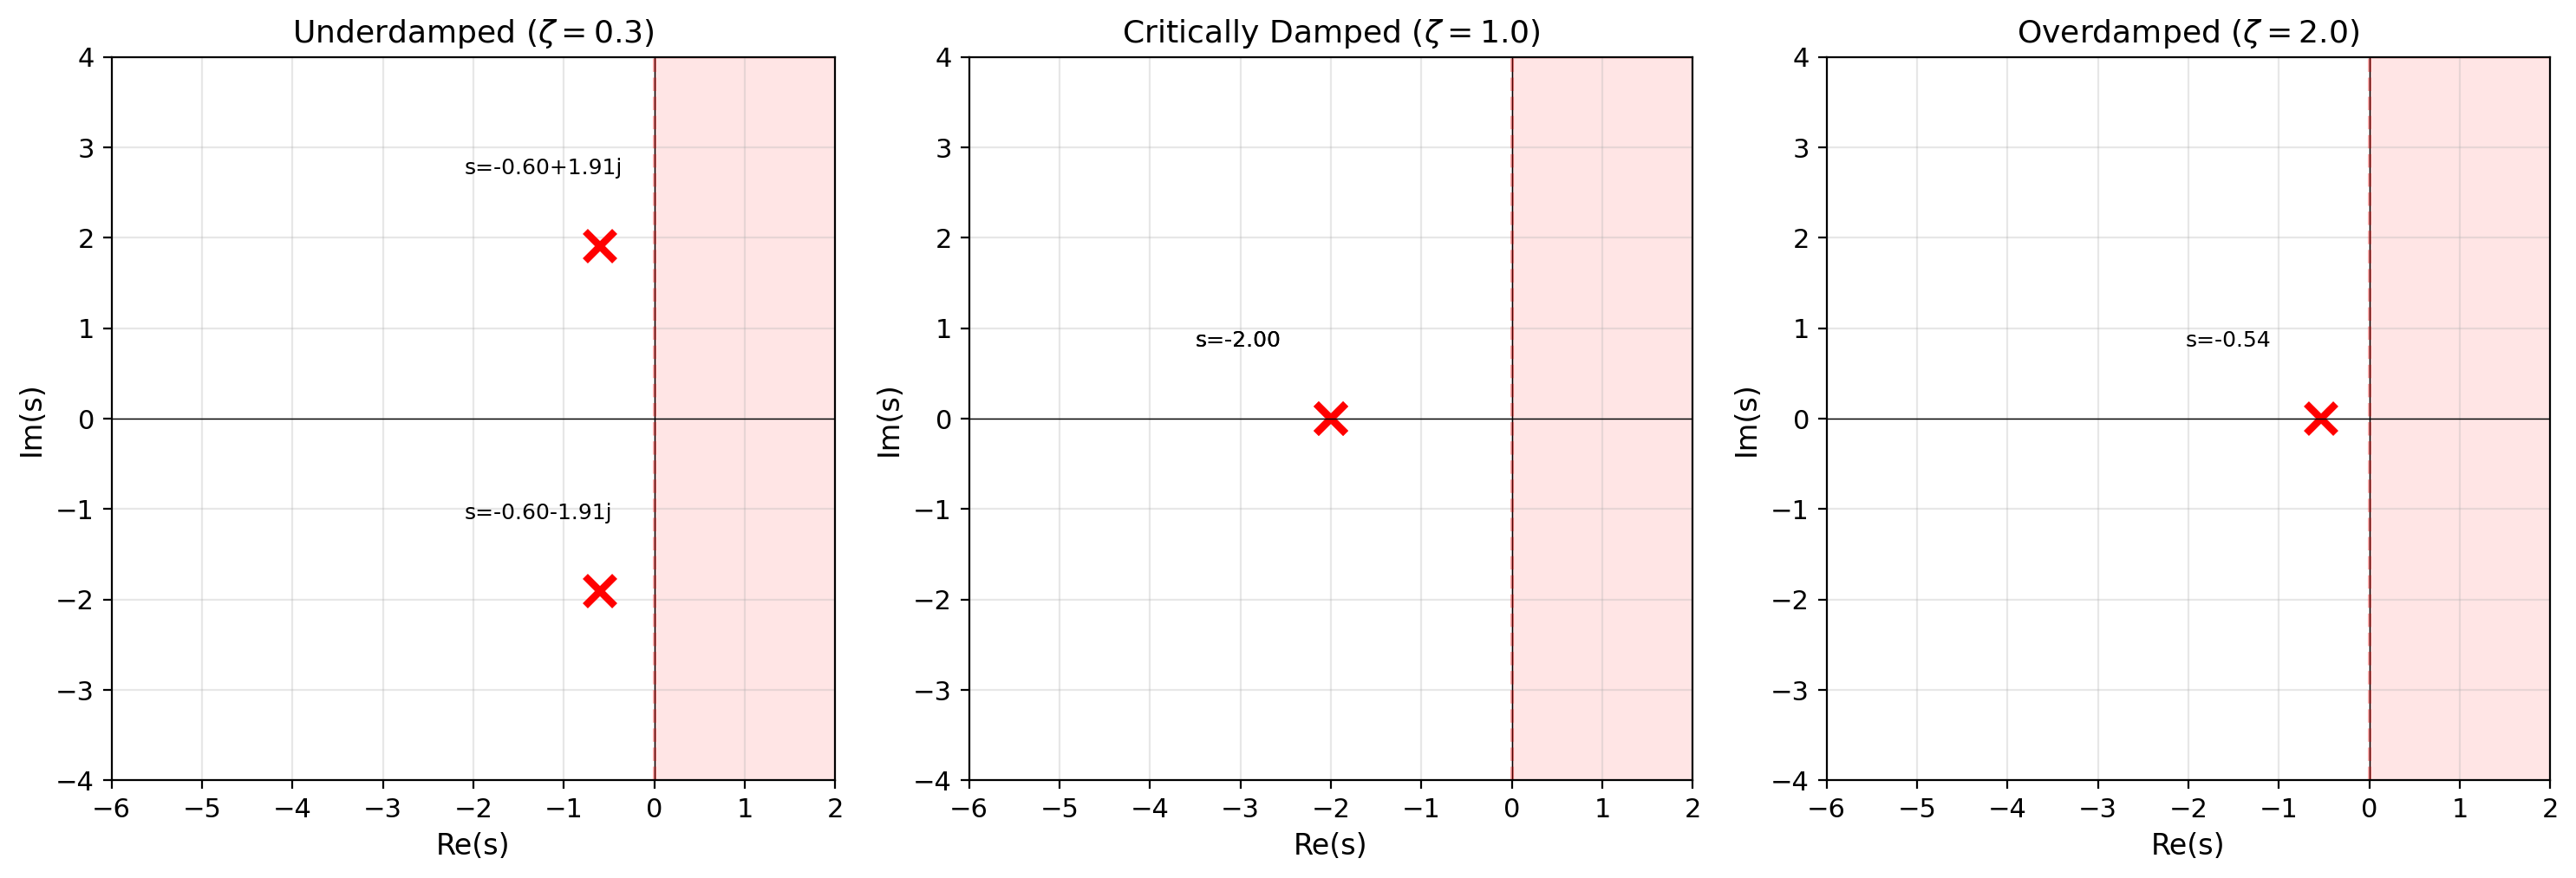

In [5]:
# Pole-zero plot for different damping ratios
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

omega_n = 2.0
zeta_cases = [(0.3, 'Underdamped'), (1.0, 'Critically Damped'), (2.0, 'Overdamped')]

for ax, (zeta, title) in zip(axes, zeta_cases):
    # Compute poles
    discriminant = zeta**2 - 1
    
    if discriminant < 0:
        # Complex conjugate poles
        real_part = -zeta * omega_n
        imag_part = omega_n * np.sqrt(-discriminant)
        poles = [complex(real_part, imag_part), complex(real_part, -imag_part)]
    elif discriminant == 0:
        # Repeated real poles
        poles = [-zeta * omega_n, -zeta * omega_n]
    else:
        # Two distinct real poles
        poles = [-zeta * omega_n + omega_n * np.sqrt(discriminant),
                 -zeta * omega_n - omega_n * np.sqrt(discriminant)]
    
    # Plot poles
    for pole in poles:
        ax.plot(np.real(pole), np.imag(pole), 'rx', markersize=12, markeredgewidth=3)
    
    # Draw axes
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    
    # Draw stability boundary
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.3, label='Stability boundary')
    
    # Shade unstable region
    ax.axvspan(0, 5, alpha=0.1, color='red')
    
    ax.set_xlabel(r'Re(s)')
    ax.set_ylabel(r'Im(s)')
    ax.set_title(f'{title} ($\\zeta={zeta}$)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([-6, 2])
    ax.set_ylim([-4, 4])
    ax.set_aspect('equal')
    
    # Annotate pole locations
    for i, pole in enumerate(poles):
        ax.annotate(f's={pole:.2f}', 
                    xy=(np.real(pole), np.imag(pole)),
                    xytext=(np.real(pole)-1.5, np.imag(pole)+0.8),
                    fontsize=9)

plt.tight_layout()
plt.show()

## Frequency Response: Bode Plot

The Bode plot shows the magnitude and phase of the transfer function $H(j\omega)$ as functions of frequency. This is obtained by evaluating $H(s)$ along the imaginary axis ($s = j\omega$).

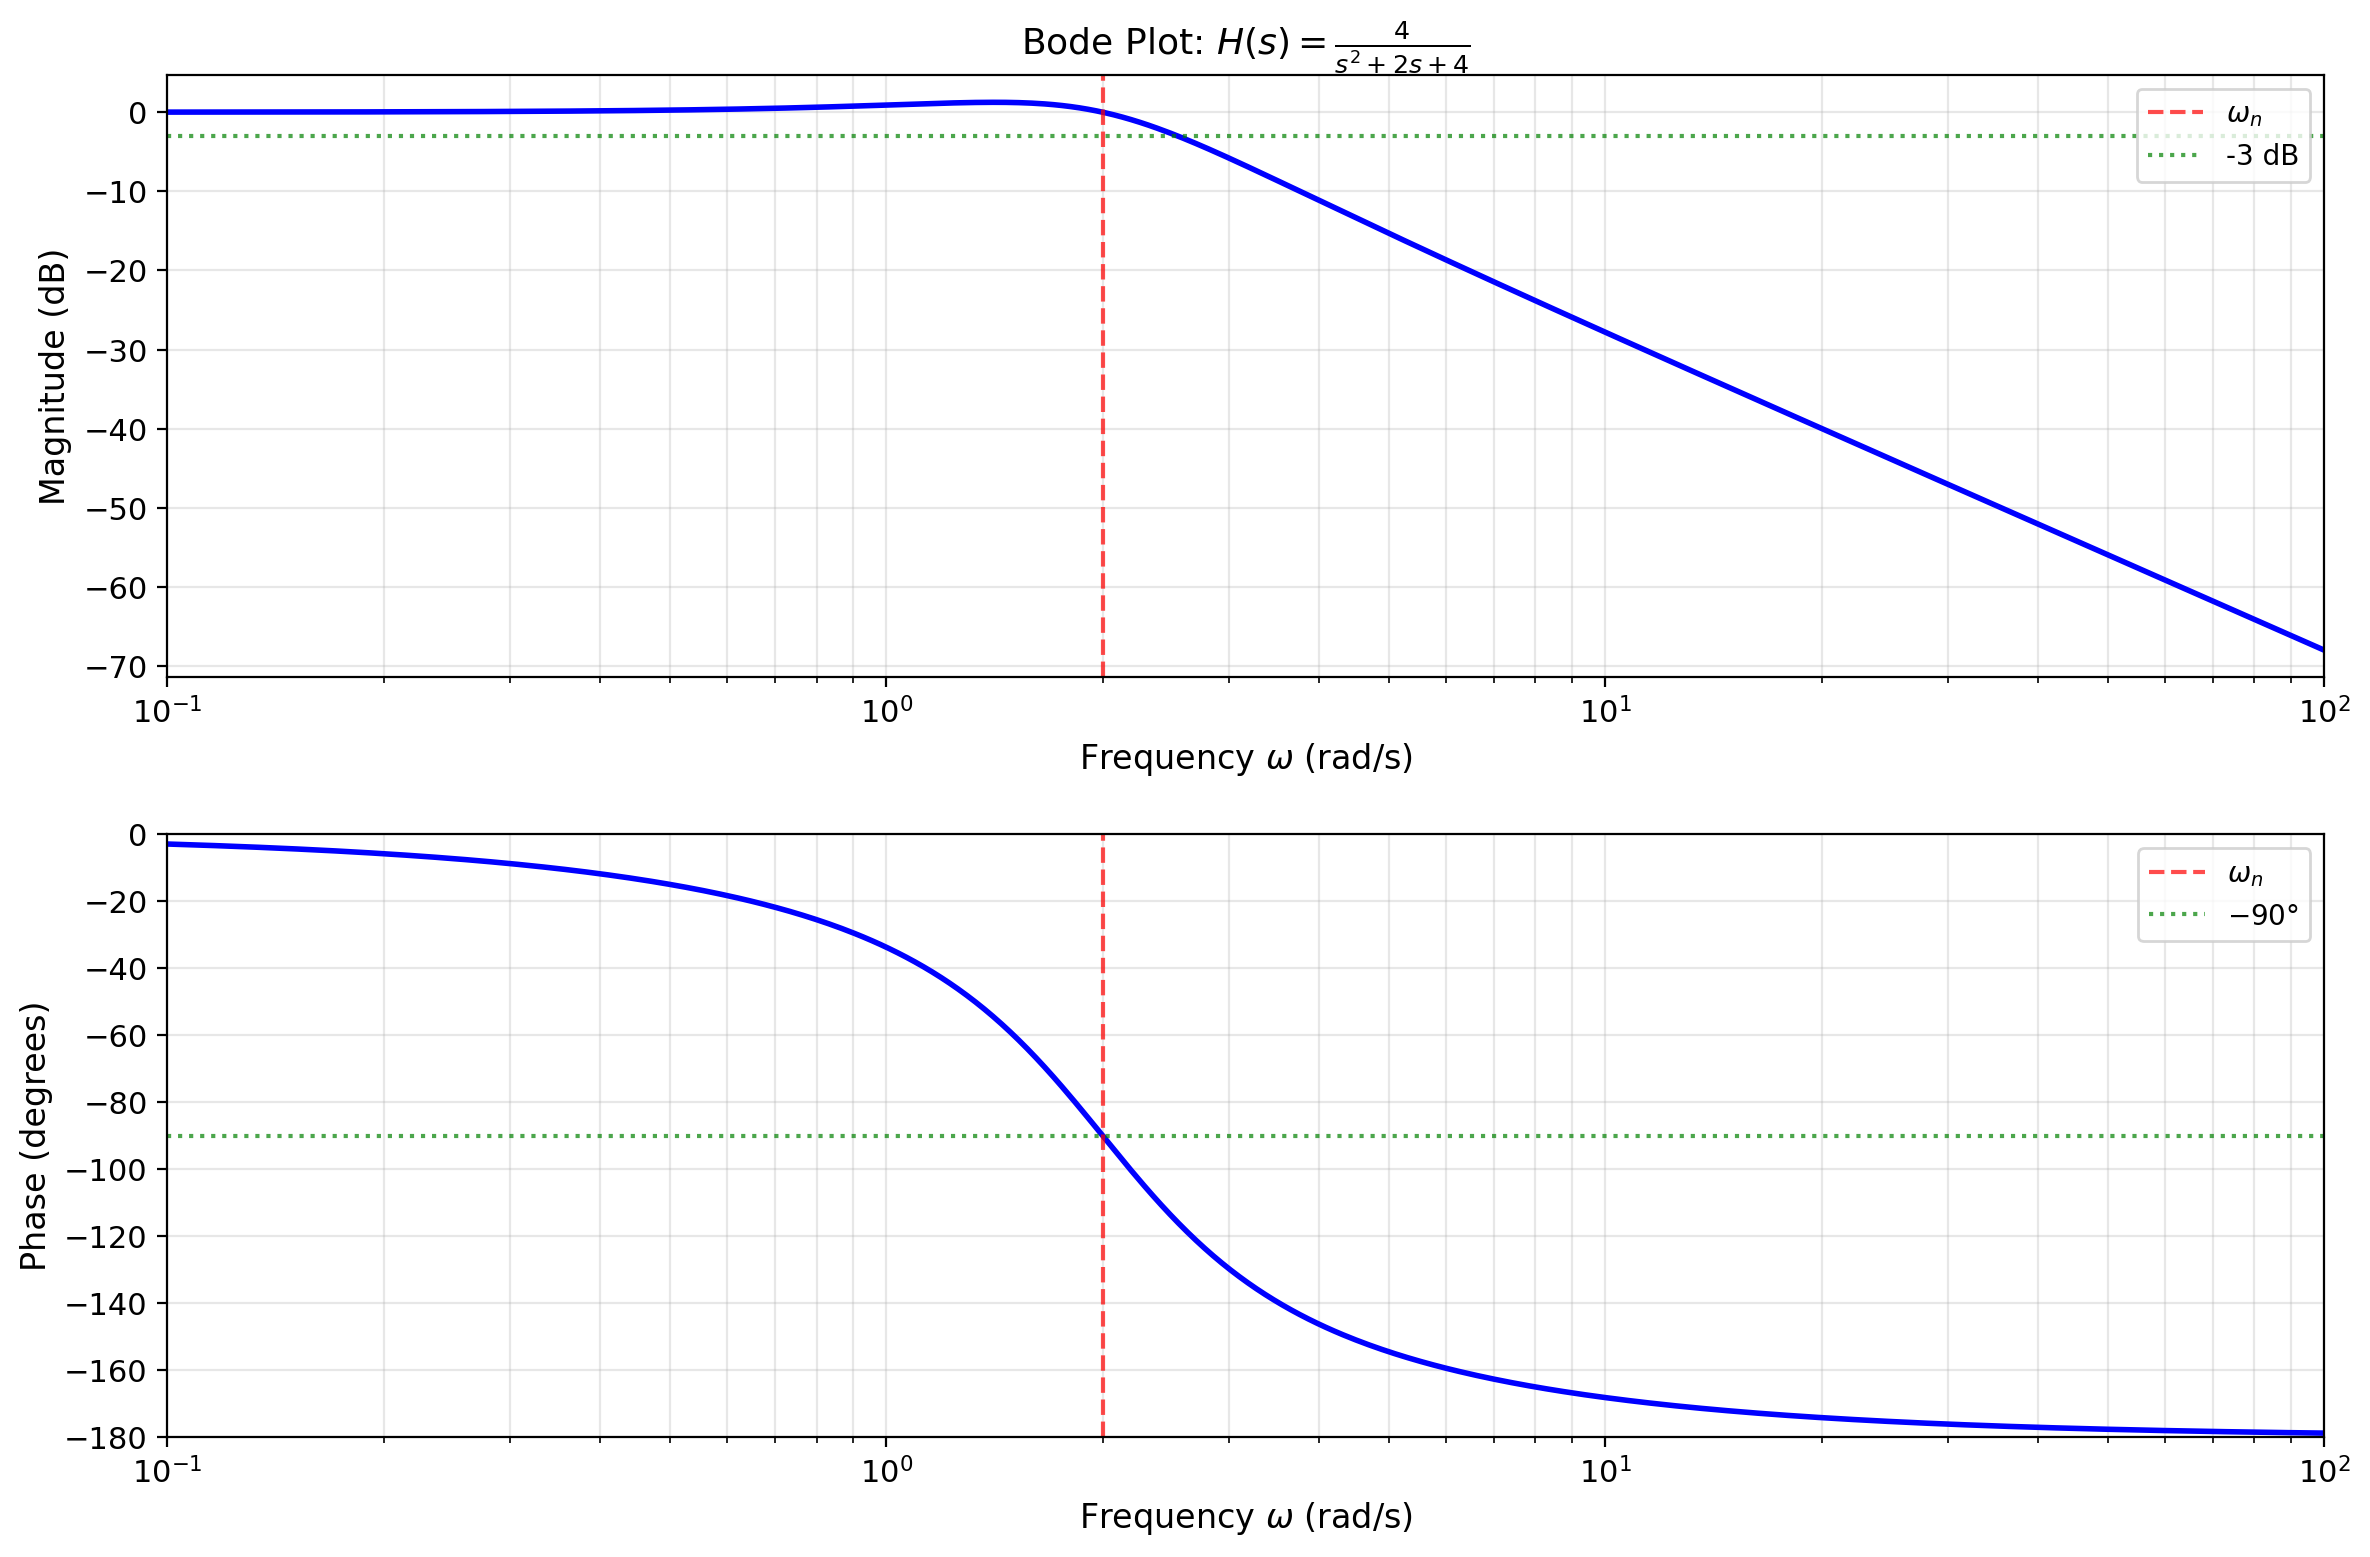

In [6]:
# Bode plot for second-order system
omega_n = 2.0
zeta = 0.5

num = [omega_n**2]
den = [1, 2*zeta*omega_n, omega_n**2]
sys = signal.TransferFunction(num, den)

# Compute frequency response
w, H = signal.freqs(num, den, worN=np.logspace(-1, 2, 500))

# Convert to dB and degrees
magnitude_db = 20 * np.log10(np.abs(H))
phase_deg = np.angle(H, deg=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Magnitude plot
ax1.semilogx(w, magnitude_db, 'b-', linewidth=2)
ax1.axvline(x=omega_n, color='r', linestyle='--', alpha=0.7, label=r'$\omega_n$')
ax1.axhline(y=-3, color='g', linestyle=':', alpha=0.7, label='-3 dB')
ax1.set_xlabel(r'Frequency $\omega$ (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title(r'Bode Plot: $H(s) = \frac{4}{s^2 + 2s + 4}$')
ax1.grid(True, which='both', alpha=0.3)
ax1.legend(loc='upper right')
ax1.set_xlim([0.1, 100])

# Phase plot
ax2.semilogx(w, phase_deg, 'b-', linewidth=2)
ax2.axvline(x=omega_n, color='r', linestyle='--', alpha=0.7, label=r'$\omega_n$')
ax2.axhline(y=-90, color='g', linestyle=':', alpha=0.7, label=r'$-90°$')
ax2.set_xlabel(r'Frequency $\omega$ (rad/s)')
ax2.set_ylabel('Phase (degrees)')
ax2.grid(True, which='both', alpha=0.3)
ax2.legend(loc='upper right')
ax2.set_xlim([0.1, 100])
ax2.set_ylim([-180, 0])

plt.tight_layout()
plt.show()

## Convolution Theorem Application

The convolution theorem states that convolution in the time domain corresponds to multiplication in the frequency domain:

$$\mathcal{L}\{(f * g)(t)\} = F(s) \cdot G(s)$$

This is the mathematical foundation for using transfer functions in system analysis.

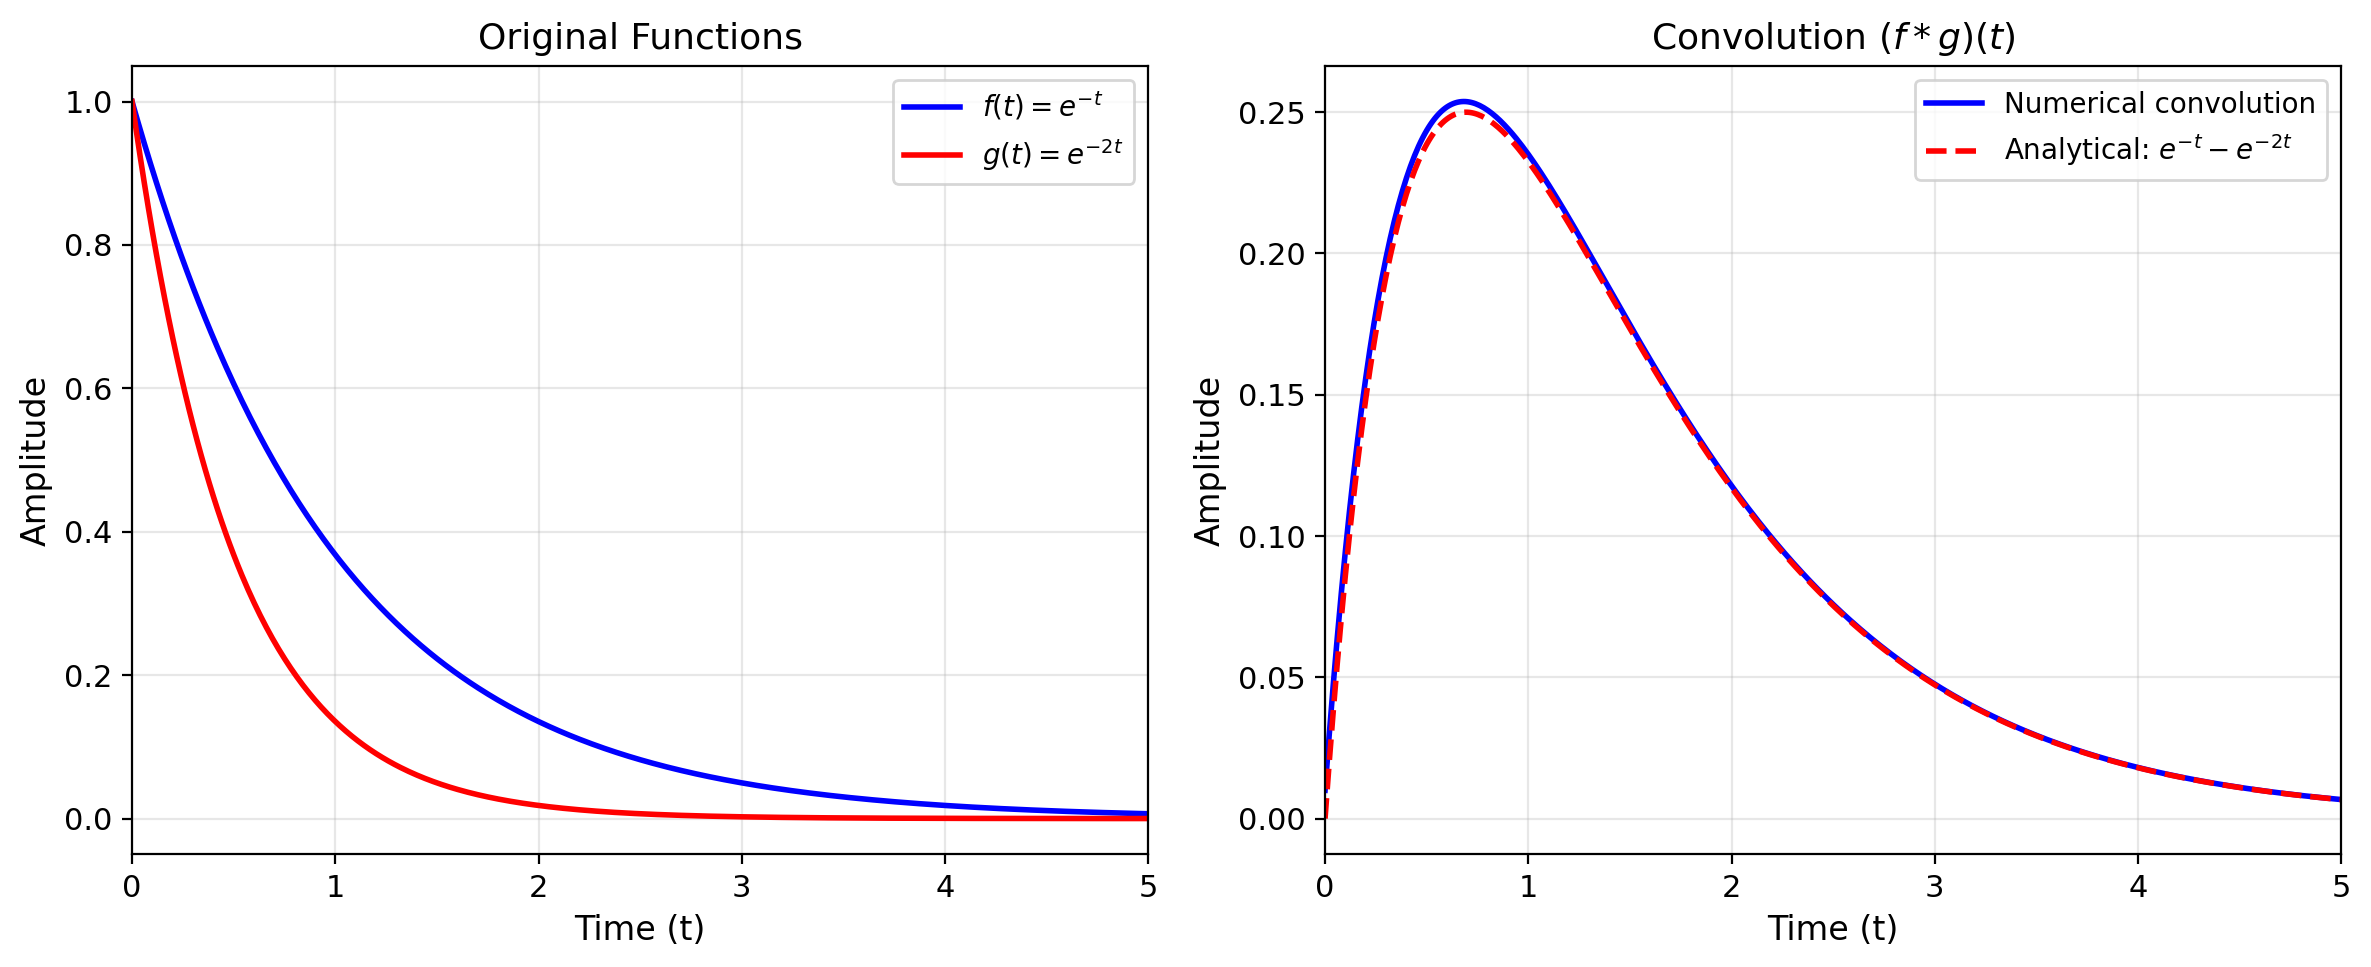


The convolution theorem allows us to compute convolutions
by multiplying in the s-domain, which is often simpler.


In [7]:
# Demonstrate convolution theorem
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

# Define two functions
# f(t) = e^(-t) * u(t)
# g(t) = e^(-2t) * u(t)
f = np.exp(-t)
g = np.exp(-2*t)

# Numerical convolution
conv_numerical = np.convolve(f, g, mode='full')[:len(t)] * dt

# Analytical result: (f*g)(t) = e^(-t) - e^(-2t)
# This comes from: F(s) = 1/(s+1), G(s) = 1/(s+2)
# F(s)*G(s) = 1/((s+1)(s+2)) = 1/(s+1) - 1/(s+2) [partial fractions]
conv_analytical = np.exp(-t) - np.exp(-2*t)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, f, 'b-', linewidth=2, label=r'$f(t) = e^{-t}$')
plt.plot(t, g, 'r-', linewidth=2, label=r'$g(t) = e^{-2t}$')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Original Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 5])

plt.subplot(1, 2, 2)
plt.plot(t, conv_numerical, 'b-', linewidth=2, label='Numerical convolution')
plt.plot(t, conv_analytical, 'r--', linewidth=2, label=r'Analytical: $e^{-t} - e^{-2t}$')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title(r'Convolution $(f * g)(t)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([0, 5])

plt.tight_layout()
plt.show()

print("\nThe convolution theorem allows us to compute convolutions")
print("by multiplying in the s-domain, which is often simpler.")

## Summary

The Laplace transform is a fundamental tool in engineering and applied mathematics that:

1. **Converts differential equations to algebraic equations**, simplifying their solution
2. **Naturally incorporates initial conditions** in the transformation process
3. **Enables transfer function analysis** for understanding system behavior
4. **Provides insight through pole-zero analysis** in the complex s-plane
5. **Connects time-domain convolution to frequency-domain multiplication**

Key applications include:
- Control systems engineering
- Signal processing
- Circuit analysis
- Mechanical vibration analysis
- Stability analysis of dynamical systems

The relationship between pole locations and system stability is particularly important: a system is stable if and only if all poles have negative real parts (lie in the left half of the s-plane).